In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/exports/home/paval/papers/frontiers23/conda_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from io import BytesIO
from PIL import Image

/tmp/ipykernel_29037/2695165945.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),


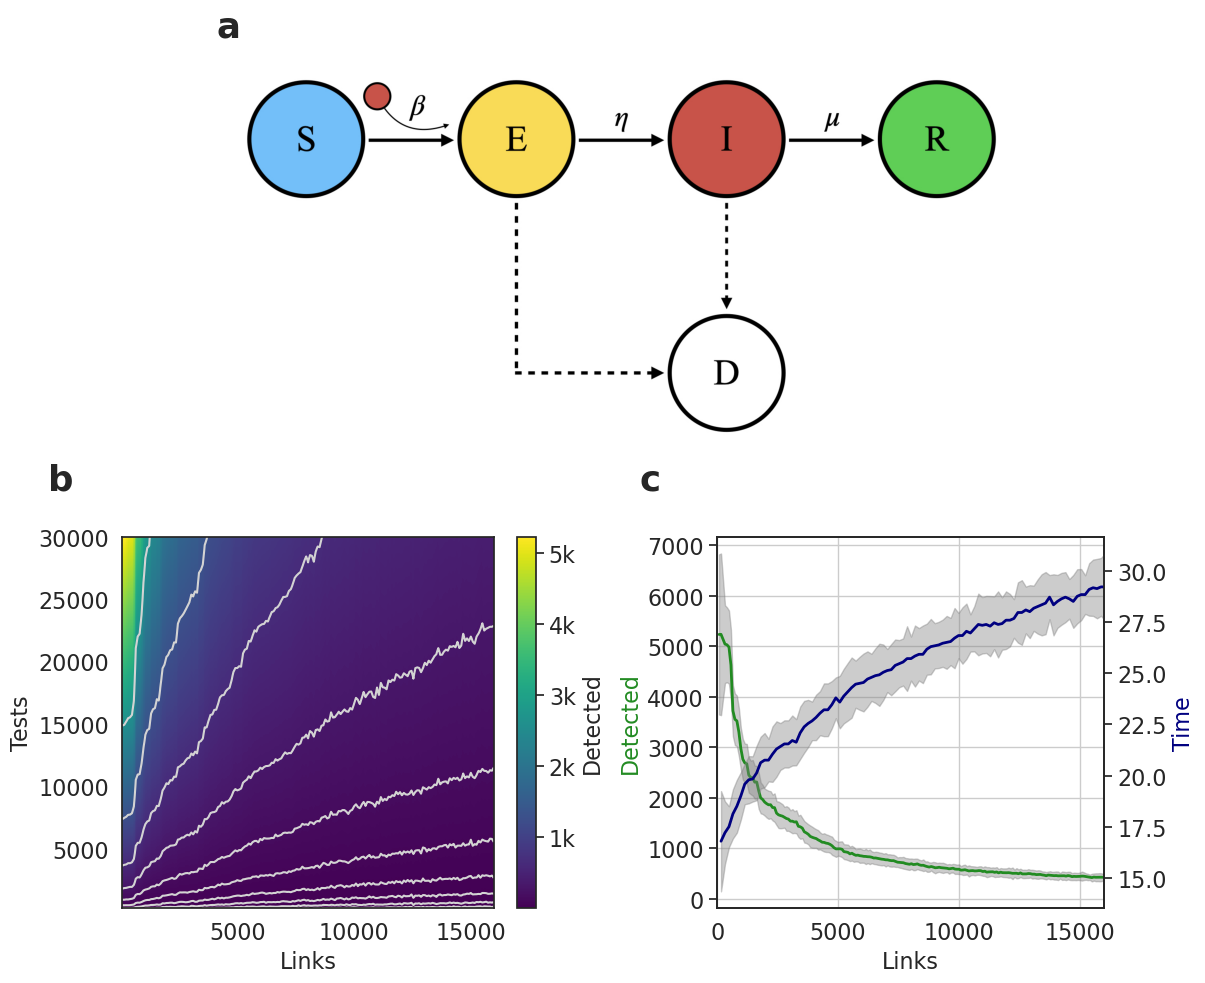

In [5]:

name = 'ma'
sns.set_theme(style="white")

fig,axes = plt.subplot_mosaic('AA;BC' ,figsize=(12, 10), width_ratios=[1.2, 1], height_ratios=[1.2,1])
[ax_img,ax,ax1] = axes.values()

label_size = 16
abc_size = 16*1.6

#_______________________________________________________

#open jpeg image from path
img = Image.open('figures/Fig1/seir_tests.jpeg')
#img = Image.open(BytesIO())
ax_img.axis('off')
ax_img.imshow(img)

#_______________________________________________________
betastr = '3,0'
heatmap = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
heatmap = heatmap[heatmap['links'] < 16000]
# PIVOT TABLE
x = heatmap['links'].to_numpy()
y = heatmap['tests'].to_numpy()
z = heatmap['detected'].to_numpy()

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(z.min()+0.00000001), np.log10(z.max()), 12)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

shape_x = len(np.unique(x))
shape_y = len(np.unique(y))

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax.imshow(np.flip(z.reshape(shape_x, shape_y), 1).transpose(), extent=(x.min(), x.max(), y.min(), y.max()), aspect='auto',
            cmap=colormap, norm=Normalize(levs.min()+0.01, levs.max()))  # , norm=LogNorm(levs.min(),levs.max()))
ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),
            norm=Normalize(levs.min()+0.01, levs.max()), colors='lightgrey', lw=2)  # , norm=LogNorm(levs.min(),levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs), vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax, format= mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))

ax.set_xlabel('Links', size=label_size)
ax.set_ylabel('Tests', size=label_size)
ax.tick_params(labelsize=label_size)

cbar2.ax.tick_params(labelsize=label_size)
cbar2.ax.set_ylabel('Detected', size=label_size)




#_______________________________________________________

data = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
data = data[data['tests']==30000]
sns.set_theme(style="ticks")

ax2 = ax1.twinx()
ax1.plot('links', 'detected', data=data, color='forestgreen', lw=2)
ax1.fill_between(data=data, x=data['links'], y1=data['detected']+ 1*data['error'], y2=data['detected']-1*data['error'], color='gray', alpha=0.4)

# ax1.set_title(name, size=16)
ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Detected', size=label_size, color='forestgreen')
ax1.tick_params(labelsize=label_size)

times = pd.read_csv('times/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
ax2.plot('links', 'time', data=times, color='navy', lw=2)
ax2.fill_between(data=times, x=times['links'], y1=times['time']+times['error'], y2=times['time']-times['error'], color='gray', alpha=0.4)
# ax2.set_title(name, size=16)
ax2.set_xlabel('Links', size=label_size)
ax2.set_ylabel('Time', size=label_size, color='navy')
ax2.tick_params(labelsize=label_size)

ax1.set_xlim(0, 16000)

ax1.grid('True')


#_______________________________________________________


ax_img.text(0,0, s='a', fontsize=abc_size, fontweight='bold', va='top', ha='left')
ax.text(-0.2,1.2, s='b', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax.transAxes)
ax1.text(-0.2,1.2, s='c', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax1.transAxes)


fig.tight_layout(w_pad=1)


In [13]:
fig.savefig('figures/Fig1/Fig1.pdf', dpi=300, bbox_inches="tight")


In [13]:
total_pop

54890

/tmp/ipykernel_29037/2624102133.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{i:.2f}%".format(i=100*i) for i in ax.get_xticks()])
/tmp/ipykernel_29037/2624102133.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{i:.0f}K".format(i=i) for i in ax.get_yticks()])


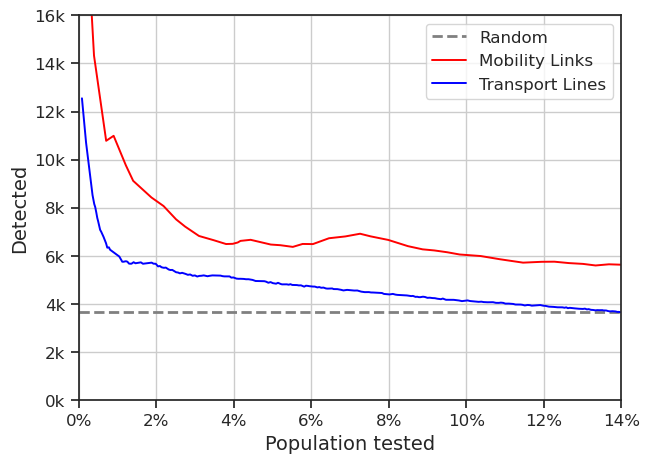

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

name = 'bogota'

betastr = '8,0'

tests_links = pd.read_csv('times/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
tests_transport = pd.read_csv('public_transport/times/out/' + name + '_transport_30k_beta_' + betastr +
                        '.txt', sep='\t')

transport = tests_transport[tests_transport['tests']==30000]
links = tests_links[tests_links['tests']==30000]

lower = links['detected'].min()
lower = 3648
ax.plot([0,7100000], [lower, lower], label='Random', c = 'grey', lw = 2, linestyle = 'dashed')
ax.plot(links['population'], links['detected'], label='Mobility Links', c = 'red', lw=1.4)
ax.plot(transport['population'], transport['detected'], label='Transport Lines', c = 'blue', lw=1.4)

ax.legend(fontsize=12)

total_pop = links['population'].max()

ax.set_xlabel('Population tested', size=14)
ax.set_ylabel('Detected', size=14)
ax.tick_params(labelsize=12)
ax.set_xlim(0,0.14*total_pop)
ax.set_ylim(0,16000)

ax.set_xticklabels(["{i:.2f}%".format(i=100*i) for i in ax.get_xticks()])
ax.set_yticklabels(["{i:.0f}K".format(i=i) for i in ax.get_yticks()])

ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/total_pop*100) + '%'))
percentages = np.array([0,2,4,6,8,10,12,14])
percentages = percentages * total_pop / 100
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(percentages))
ax.grid('True')

plt.savefig('figures/tests/tests3.svg', dpi=220, bbox_inches="tight")

In [18]:
name = 'bogota'

sns.set_theme(style="white")

heatmap = pd.read_csv('confinement/out/attackRateMap/' + name + 'beta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])

# PIVOT TABLE

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

colormap = 'viridis'

/tmp/ipykernel_19109/366852909.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linearColor = mpl.cm.get_cmap('inferno_r')


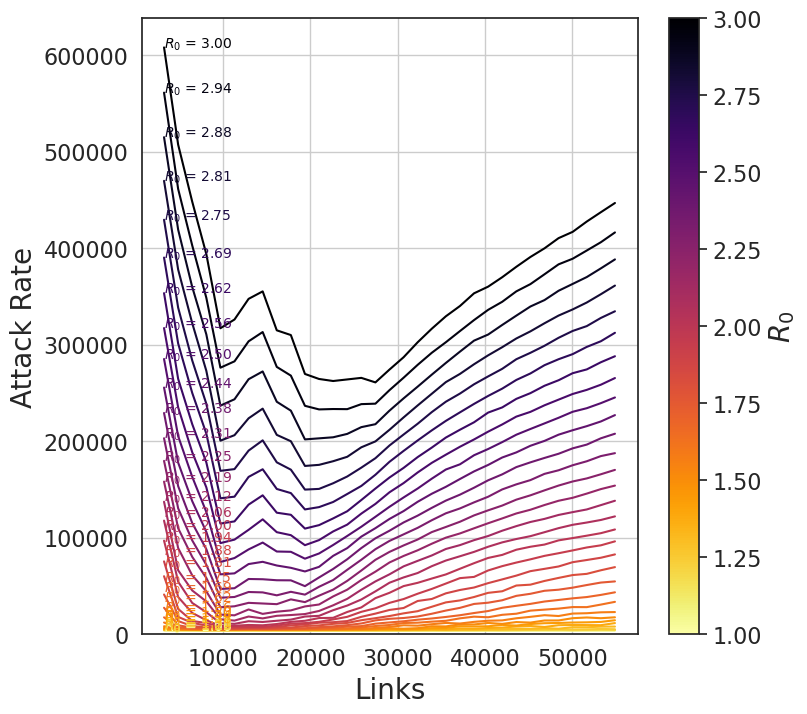

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
linearColor = mpl.cm.get_cmap('inferno_r')
beta_max,beta_min = 3, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    plt.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color)
    ax.text(heatmap[heatmap['beta']==val]['links'].min(), heatmap[heatmap['beta']==val]['attackRate'].max(), r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=10)
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

ax.set_ylim(0,)

plt.savefig('figures/confinement/bogota_attackrate.pdf', bbox_inches="tight")

In [20]:
name = 'bogota_transport'
sns.set_theme(style="white")

heatmap = pd.read_csv('public_transport/confinement/out/attackRateMap/' + name + '_beta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])


# PIVOT TABLE

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

colormap = 'viridis'

/tmp/ipykernel_19109/1628162499.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linearColor = mpl.cm.get_cmap('inferno_r')


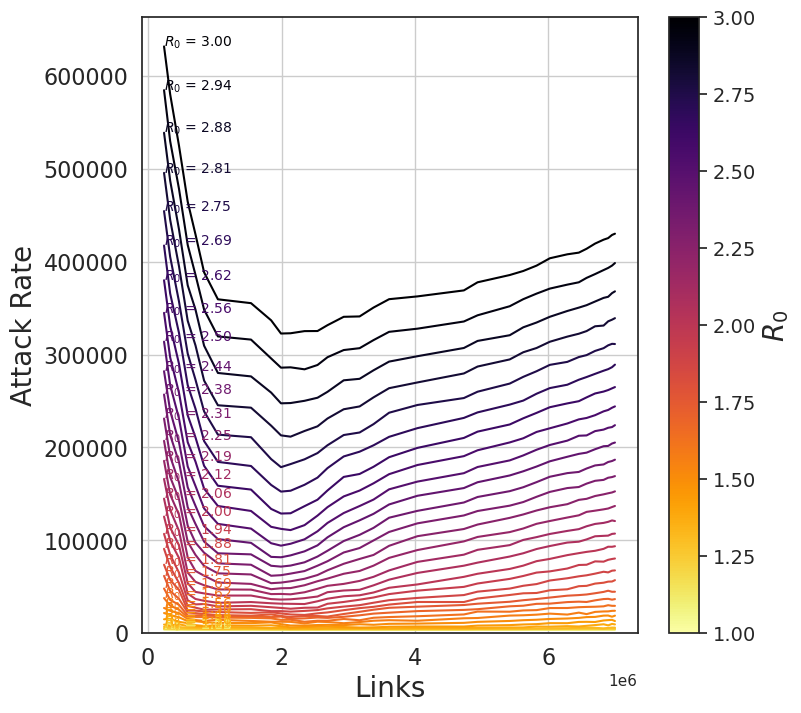

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
linearColor = mpl.cm.get_cmap('inferno_r')
beta_max,beta_min = 3,1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    plt.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color)
    ax.text(heatmap[heatmap['beta']==val]['links'].min(), heatmap[heatmap['beta']==val]['attackRate'].max(), r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=10)
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

ax.set_ylim(0,)

plt.savefig('figures/confinement/bogota_transport_attackrate.pdf', bbox_inches="tight")